<a href="https://www.kaggle.com/code/dasaris/decision-tree-and-random-forest?scriptVersionId=98971839" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Using a Decision Tree and Random Forest to predict loan payments

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

### Load the data

In [2]:
loans = pd.read_csv('../input/loan-data/loan_data.csv')

## EDA

**credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

**purpose**: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").

**int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

**installment:** The monthly installments owed by the borrower if the loan is funded.

**log.annual.inc:** The natural log of the self-reported annual income of the borrower.

**dti:** The debt-to-income ratio of the borrower (amount of debt divided by annual income).

**fico:** The FICO credit score of the borrower.

**days.with.cr.line:** The number of days the borrower has had a credit line.

**revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

**revol.util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

**inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.

**delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

**pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [3]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
sns.set_style('whitegrid')

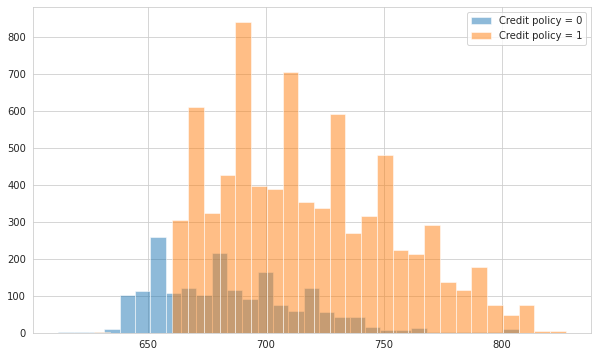

In [7]:
#Distribution of customers who meet the credit policy and who don't meet it and their FICO score

plt.figure(figsize=(10,6))
loans[loans['credit.policy'] == 0]['fico'].hist(bins = 30, alpha = 0.5, label='Credit policy = 0')
loans[loans['credit.policy'] == 1]['fico'].hist(bins = 30, alpha = 0.5, label='Credit policy = 1')

plt.legend()

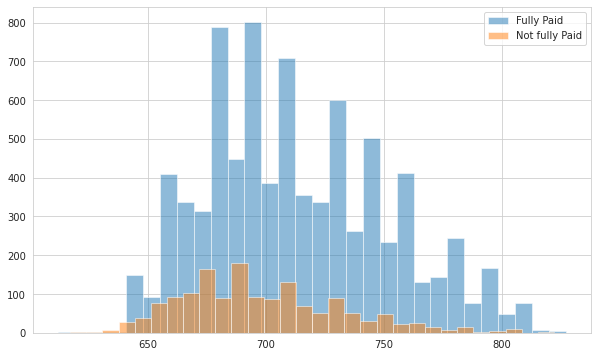

In [8]:
#distribution of not fully and fully paid loans

plt.figure(figsize=(10,6))
loans[loans['not.fully.paid'] == 0]['fico'].hist(bins = 30, alpha = 0.5, label='Fully Paid')
loans[loans['not.fully.paid'] == 1]['fico'].hist(bins = 30, alpha = 0.5, label='Not fully Paid')

plt.legend()

<AxesSubplot:xlabel='purpose', ylabel='count'>

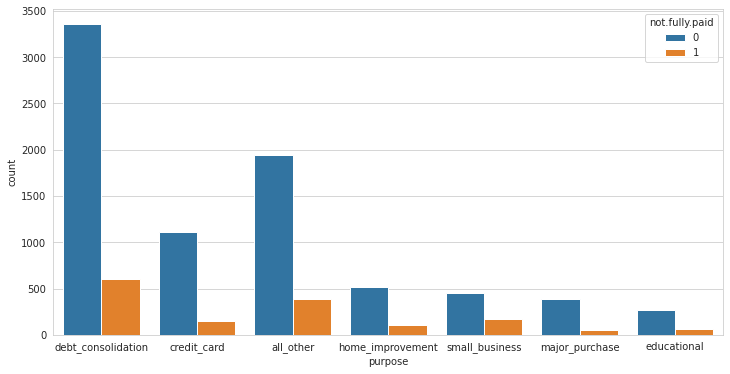

In [9]:
# Plotting distribution of loans by purpose

plt.figure(figsize= (12,6))
sns.countplot(x = 'purpose', data = loans, hue = 'not.fully.paid')

<Figure size 864x648 with 0 Axes>

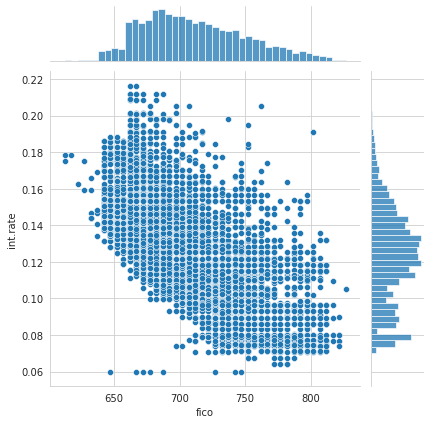

In [10]:
# Is there a trend between FICO Score and Interest Rates?

plt.figure(figsize= (12,9))
sns.jointplot(x = 'fico', y = 'int.rate', data = loans)

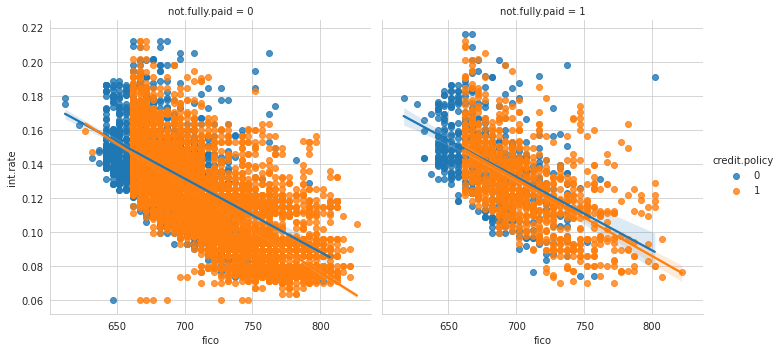

In [11]:
sns.lmplot(x = 'fico', y = 'int.rate', col = 'not.fully.paid', hue = 'credit.policy', data = loans)

<AxesSubplot:>

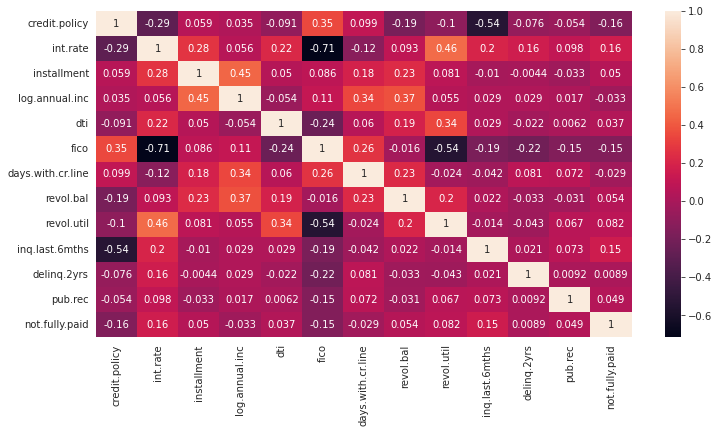

In [12]:
#Searching for Correlations
plt.figure(figsize = (12,6))

sns.heatmap(loans.corr(), annot = True)

#No strong correlation between any of the features visible

## Preparing the data

I want to have the purpose column as an extra feature. That's why I have to get dummy values for this column

In [13]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [14]:
cat_features = ['purpose']
loans_final= pd.get_dummies(loans,columns=cat_features,drop_first=True)

In [15]:
loans_final.isnull().sum()
#no Null values

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64

## Building the model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [17]:
X = loans_final.drop('not.fully.paid', axis = 1)
y = loans_final['not.fully.paid']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [19]:
dtree = DecisionTreeClassifier()

In [20]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions based on model

In [21]:
pred = dtree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
score = dtree.score(X_test, y_test)
print('Test Accuracy Score is: \n', score)
print('\n')
print('Confusion Matrix: \n',confusion_matrix(y_test, pred))
print('\n')
print('Classification Report: \n', classification_report(y_test, pred))

Test Accuracy Score is: 
 0.7338204592901879


Confusion Matrix: 
 [[2015  393]
 [ 372   94]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      2408
           1       0.19      0.20      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



The Model is not very good. We get a lot of false positive and false negative results.

**Let's try the prediction with a random forest model:**

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(n_estimators = 1000, max_features = 2)

In [26]:
rfc.fit(X_train, y_train,)

RandomForestClassifier(max_features=2, n_estimators=1000)

In [27]:
rfc_pred = rfc.predict(X_test)

In [28]:
score = rfc.score(X_test, y_test)
print('Test Accuracy Score is: \n', score)
print('\n')
print('Confusion Matrix: \n',confusion_matrix(y_test, rfc_pred))
print('\n')
print('Classification Report: \n', classification_report(y_test, rfc_pred))

Test Accuracy Score is: 
 0.837508698677801


Confusion Matrix: 
 [[2401    7]
 [ 460    6]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.46      0.01      0.03       466

    accuracy                           0.84      2874
   macro avg       0.65      0.50      0.47      2874
weighted avg       0.78      0.84      0.77      2874



This result is better but we still get a lot of false negative results!

In [29]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, rfc_pred)
print(auc)

0.5049842798682503
